In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast
import pprint

# Pre Processing #

First we will look at the data, then decide what to do with certain categories.

Everything we do to the test set we also do to the training set, but only based on what we've seen in the test set.

One key theme is that many of the models we have learned involve / assume linear data, so many of the numeric things we will have to linearise / take the log of

In [383]:
test_dataset = pd.read_csv('test_dataset.csv')
train_dataset = pd.read_csv('train_dataset.csv')

train_X = train_dataset.drop(columns=['imdb_score_binned'])
train_y = train_dataset['imdb_score_binned']

pd.set_option('display.max_columns', None)

In [384]:
train_X.describe()

,id,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,title_year,actor_2_facebook_likes,movie_facebook_likes,average_degree_centrality
count,3004.00000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3.004000e+03,3.004000e+03,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000
mean,1502.50000,165.609188,110.076565,778.890146,767.860186,7654.935752,5.187733e+07,1.049017e+05,11391.643808,1.380826,335.922770,2002.782956,1992.843209,8972.179427,0.001739
std,867.32443,121.254549,21.910608,2990.741946,1901.991202,16488.761947,6.840156e+07,1.508573e+05,20044.723195,2.093417,415.219466,10.086250,4651.072554,19853.888300,0.001183
min,1.00000,2.000000,37.000000,0.000000,0.000000,0.000000,1.620000e+02,9.100000e+01,0.000000,0.000000,4.000000,1929.000000,0.000000,0.000000,0.000300
25%,751.75000,76.000000,96.000000,10.000000,191.000000,728.500000,8.579684e+06,1.897825e+04,1873.000000,0.000000,108.000000,1999.000000,377.750000,0.000000,0.000825
50%,1502.50000,137.000000,106.000000,62.500000,433.000000,1000.000000,3.020586e+07,5.387400e+04,3889.000000,1.000000,208.000000,2004.000000,664.000000,241.000000,0.001426
75%,2253.25000,223.000000,120.000000,234.000000,683.000000,12000.000000,6.647359e+07,1.284895e+05,15925.250000,2.000000,398.000000,2010.000000,970.000000,11000.000000,0.002401
max,3004.00000,813.000000,330.000000,23000.000000,23000.000000,640000.000000,6.586723e+08,1.689764e+06,656730.000000,43.000000,5060.000000,2016.000000,137000.000000,197000.000000,0.007354


Handling null values. From Ed it seems this one is the one with language == null

### Null Values ###

In [385]:
train_X.isnull().sum()

id                           0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
num_user_for_reviews         0
language                     1
country                      0
content_rating               0
title_year                   0
actor_2_facebook_likes       0
movie_facebook_likes         0
title_embedding              0
average_degree_centrality    0
dtype: int64

There is no null value in the test dataset, so I will go in to manually fix it

In [386]:
train_X[train_X['language'].isnull()]

,id,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,num_user_for_reviews,language,country,content_rating,title_year,actor_2_facebook_likes,movie_facebook_likes,title_embedding,average_degree_centrality
2787,2788,Ron Fricke,115,102,330,0,Balinese Tari Legong Dancers,48,2601847,Documentary|Music,Collin Alfredo St. Dic,Samsara,22457,48,Puti Sri Candra Dewi,0,hall of mirrors|mont saint michel france|palac...,69,NaN,USA,PG-13,2011,0,26000,[-1.7939140e-04 1.7596362e-03 -8.5148757e-05 ...,0.0003


### Language ###

In [387]:
train_X['language'].value_counts()

language
English       2872
French          32
Spanish         19
Mandarin         9
Japanese         9
German           9
Italian          5
Cantonese        5
Korean           4
Portuguese       4
Hindi            3
Norwegian        3
Dutch            3
Danish           3
Aboriginal       2
Thai             2
Indonesian       2
Dari             2
Persian          2
Kazakh           1
Maya             1
Aramaic          1
Filipino         1
Bosnian          1
Czech            1
Zulu             1
Vietnamese       1
Hungarian        1
Hebrew           1
Mongolian        1
Romanian         1
Arabic           1
Name: count, dtype: int64

Some research online reveals it is shot in 25 countries, that is why the language is hard to define. However, each language and other having its own category might really be useless, especially considering the fact that there aren't many non-english films anyway (e.g. a single category for 'Norwegian' would be useless). Instead I will create a category for English or Non-English. Assuming the test data is distributed similarly, individual categories for each language wouldn't make much sense either

In [388]:
train_X['English'] = train_X['language'].map(lambda x: 1 if (x == 'English') else 0)
test_dataset['English'] = test_dataset['language'].map(lambda x: 1 if (x == 'English') else 0)

### Country ###

In [389]:
train_X['country'].value_counts()

country
USA               2382
UK                 255
France              86
Germany             61
Canada              46
Australia           32
Spain               21
Japan               12
New Zealand         10
China                9
Hong Kong            9
Italy                8
South Korea          7
Ireland              6
Mexico               6
Denmark              6
Brazil               4
Thailand             3
South Africa         3
Argentina            3
Iran                 3
Netherlands          3
India                3
Norway               3
Taiwan               2
Czech Republic       2
Russia               2
Romania              2
Hungary              2
Colombia             1
Israel               1
West Germany         1
Official site        1
Afghanistan          1
Aruba                1
Chile                1
Finland              1
Iceland              1
Poland               1
Belgium              1
New Line             1
Indonesia            1
Name: count, dtype: int64

In [390]:
countries = ['USA', 'UK', 'France', 'Germany', 'Canada', 'Australia', 'Spain', 'Japan', 'New Zealand', 'China', 'Hong Kong' , 'Italy']

for country in countries:
    train_X[country] = train_X['country'].map(lambda x: 1 if (x == country) else 0)
    test_dataset[country] = test_dataset['country'].map(lambda x: 1 if (x == country) else 0)

I will one hot encode all the way up to New Zealand. Anything beyond that there really isn't much data to work with. Implicitly if they are all zero, they are in the 'left out' other category

### Content Rating ###

In [391]:
train_X['content_rating'].value_counts()

content_rating
R            1362
PG-13        1039
PG            458
G              68
Not Rated      27
Unrated        19
Approved       14
X               9
NC-17           3
M               2
Passed          2
GP              1
Name: count, dtype: int64

I will join Not Rated and Unrated into their own category.

After some research online:

https://rating-system.fandom.com/wiki/GP PG replaced GP, and GP replaced M, hence we can group these into the same rating (using PG).

https://movies.stackexchange.com/questions/65430/what-are-the-meanings-of-the-terms-passed-and-approved-with-regards-to-a-mov
Approved and passed seem to be the same too 

https://rating-system.fandom.com/wiki/X_(MPAA) and X was replaced by NC-17

In [392]:
train_X['content_rating'] = train_X['content_rating'].map(lambda x: 'PG' if (x == 'GP' or x == 'M') else x)
train_X['content_rating'] = train_X['content_rating'].map(lambda x: 'Unrated' if (x == 'Not Rated' or x == 'Passed' or x == 'Approved') else x)
train_X['content_rating'] = train_X['content_rating'].map(lambda x: 'NC-17' if (x == 'X') else x)

test_dataset['content_rating'] = test_dataset['content_rating'].map(lambda x: 'PG' if (x == 'GP' or x == 'M') else x)
test_dataset['content_rating'] = test_dataset['content_rating'].map(lambda x: 'Unrated' if (x == 'Not Rated' or x == 'Passed' or x == 'Approved') else x)
test_dataset['content_rating'] = test_dataset['content_rating'].map(lambda x: 'NC-17' if (x == 'X') else x)

now one hot encode them

In [393]:
ratings = list(train_X['content_rating'].unique())

for rating in ratings:
    train_X[rating] = train_X['content_rating'].map(lambda x: 1 if (x == rating) else 0)
    test_dataset[rating] = test_dataset['content_rating'].map(lambda x: 1 if (x == rating) else 0)

### Director Degree Centrality ###

Similar to average_degree_centrality which measures the centrality of the film based on shared actors, we will create a new feature: director degree centrality. 

More specifically:

$$director\_degree\_centrality = (number\_of\_movies\_by\_director - 1) / (number\_of\_movies\_in\_the\_training\_set - 1)$$

We subtract 1 from the numerator to NOT count the self-connection. The denominator is adjsuted by 1 because the maximum possible connections without a self connection is now one less.

In [394]:
director_counts_dict = train_X['director_name'].value_counts().to_dict()
number_of_movies = train_X.shape[0]

train_X['director_degree_centrality'] = train_X['director_name'].map(lambda x: (director_counts_dict.get(x) - 1) / (number_of_movies - 1))
test_dataset['director_degree_centrality'] = test_dataset['director_name'].map(lambda x: max(0, (director_counts_dict.get(x, 0) - 1) / (number_of_movies - 1)))

### importing pre-processed features ###

These come with MANY (100) dimensions, so we will have to apply some dimensionality reduction techniques on them

We have chosen NOT to use the one hot encoded actors, because the feature average degree centrality already uses this. We also don't include the directors because it's used in director centrality

In [395]:
test_countvec_features_actor_1_name_df = pd.DataFrame(np.load('features_countvec/test_countvec_features_actor_1_name.npy'))

train_countvec_features_actor_1_name_df = pd.DataFrame(np.load('features_countvec/train_countvec_features_actor_1_name.npy'))

test_countvec_features_actor_2_name_df = pd.DataFrame(np.load('features_countvec/test_countvec_features_actor_2_name.npy'))

train_countvec_features_actor_2_name_df = pd.DataFrame(np.load('features_countvec/train_countvec_features_actor_2_name.npy'))

test_countvec_features_director_name_df = pd.DataFrame(np.load('features_countvec/test_countvec_features_actor_2_name.npy'))

train_countvec_features_director_name_df = pd.DataFrame(np.load('features_countvec/train_countvec_features_director_name.npy'))

test_doc2vec_features_genre_df = pd.DataFrame(np.load('features_doc2vec/test_doc2vec_features_genre.npy'))
test_doc2vec_features_genre_df = test_doc2vec_features_genre_df.rename(columns={i: f"genre_vec_{i}" for i in  range(100)})

train_doc2vec_features_genre_df = pd.DataFrame(np.load('features_doc2vec/train_doc2vec_features_genre.npy'))
train_doc2vec_features_genre_df = train_doc2vec_features_genre_df.rename(columns={i: f"genre_vec_{i}" for i in  range(100)})

test_doc2vec_features_plot_keywords_df = pd.DataFrame(np.load('features_doc2vec/test_doc2vec_features_plot_keywords.npy'))
test_doc2vec_features_plot_keywords_df = test_doc2vec_features_plot_keywords_df.rename(columns={i: f"plot_keywords_vec_{i}" for i in  range(100)})

train_doc2vec_features_plot_keywords_df = pd.DataFrame(np.load('features_doc2vec/train_doc2vec_features_plot_keywords.npy'))
train_doc2vec_features_plot_keywords_df = train_doc2vec_features_plot_keywords_df.rename(columns={i: f"plot_keywords_vec_{i}" for i in  range(100)})

test_fasttext_title_embeddings_df = pd.DataFrame(np.load('features_fasttext/test_fasttext_title_embeddings.npy'))
test_fasttext_title_embeddings_df = test_fasttext_title_embeddings_df.rename(columns={i: f"test_fasttext_title_vec_{i}" for i in  range(100)})

train_fasttext_title_embeddings_df = pd.DataFrame(np.load('features_fasttext/train_fasttext_title_embeddings.npy'))
train_fasttext_title_embeddings_df = train_fasttext_title_embeddings_df.rename(columns={i: f"test_fasttext_title_vec_{i}" for i in  range(100)})

First I will try PCA dimensionality reduction to 3 dimensions. Later on, if the model fails to predict 0 as before, I will try finding the ones that have the highest correlation with score 0

In [396]:
from sklearn.decomposition import PCA

n = 10

pca = PCA(n_components=n)
train_doc2vec_features_genre_df = pd.DataFrame(pca.fit_transform(train_doc2vec_features_genre_df))
train_doc2vec_features_genre_df = train_doc2vec_features_genre_df.rename(columns={i: f"genre_PCA_vec_{i}" for i in  range(n)})
test_doc2vec_features_genre_df = pd.DataFrame(pca.transform(test_doc2vec_features_genre_df))
test_doc2vec_features_genre_df = test_doc2vec_features_genre_df.rename(columns={i: f"genre_PCA_vec_{i}" for i in  range(n)})

pca = PCA(n_components=n)
train_doc2vec_features_plot_keywords_df = pd.DataFrame(pca.fit_transform(train_doc2vec_features_plot_keywords_df))
train_doc2vec_features_plot_keywords_df = train_doc2vec_features_plot_keywords_df.rename(columns={i: f"plot_keywords_PCA_vec_{i}" for i in  range(n)})
test_doc2vec_features_plot_keywords_df = pd.DataFrame(pca.transform(test_doc2vec_features_plot_keywords_df))
test_doc2vec_features_plot_keywords_df = test_doc2vec_features_plot_keywords_df.rename(columns={i: f"plot_keywords_PCA_vec_{i}" for i in  range(n)})

pca = PCA(n_components=n)
train_fasttext_title_embeddings_df = pd.DataFrame(pca.fit_transform(train_fasttext_title_embeddings_df))
train_fasttext_title_embeddings_df = train_fasttext_title_embeddings_df.rename(columns={i: f"title_PCA_vec_{i}" for i in  range(n)})
test_fasttext_title_embeddings_df = pd.DataFrame(pca.transform(test_fasttext_title_embeddings_df))
test_fasttext_title_embeddings_df = test_fasttext_title_embeddings_df.rename(columns={i: f"title_PCA_vec_{i}" for i in  range(n)})

### Dropping irrelevant columns ###

We can now drop all irrelevant columns that we have already processed into new columns or don't need.

In [397]:
train_X = train_X.drop(columns = ['id', 'director_name', 'actor_1_name', 'actor_2_name' , 'actor_3_name', 'genres', 'movie_title', 'plot_keywords', 'language', 'country', 'content_rating', 'title_embedding'])
test_dataset = test_dataset.drop(columns = ['id', 'director_name', 'actor_1_name', 'actor_2_name' , 'actor_3_name', 'genres', 'movie_title', 'plot_keywords', 'language', 'country', 'content_rating', 'title_embedding'])

### JOINING ###

In [398]:
train_X_joined = pd.concat([train_X, train_doc2vec_features_genre_df, train_doc2vec_features_plot_keywords_df,train_fasttext_title_embeddings_df], axis=1)
test_X_joined = pd.concat([test_dataset, test_doc2vec_features_genre_df, test_doc2vec_features_plot_keywords_df,test_fasttext_title_embeddings_df], axis=1)

Then also do it with the original fetures provided, to see if PCA makes a difference

In [292]:
test_countvec_features_actor_1_name_df = pd.DataFrame(np.load('features_countvec/test_countvec_features_actor_1_name.npy'))

train_countvec_features_actor_1_name_df = pd.DataFrame(np.load('features_countvec/train_countvec_features_actor_1_name.npy'))

test_countvec_features_actor_2_name_df = pd.DataFrame(np.load('features_countvec/test_countvec_features_actor_2_name.npy'))

train_countvec_features_actor_2_name_df = pd.DataFrame(np.load('features_countvec/train_countvec_features_actor_2_name.npy'))

test_countvec_features_director_name_df = pd.DataFrame(np.load('features_countvec/test_countvec_features_actor_2_name.npy'))

train_countvec_features_director_name_df = pd.DataFrame(np.load('features_countvec/train_countvec_features_director_name.npy'))

test_doc2vec_features_genre_df = pd.DataFrame(np.load('features_doc2vec/test_doc2vec_features_genre.npy'))
test_doc2vec_features_genre_df = test_doc2vec_features_genre_df.rename(columns={i: f"genre_vec_{i}" for i in  range(100)})

train_doc2vec_features_genre_df = pd.DataFrame(np.load('features_doc2vec/train_doc2vec_features_genre.npy'))
train_doc2vec_features_genre_df = train_doc2vec_features_genre_df.rename(columns={i: f"genre_vec_{i}" for i in  range(100)})

test_doc2vec_features_plot_keywords_df = pd.DataFrame(np.load('features_doc2vec/test_doc2vec_features_plot_keywords.npy'))
test_doc2vec_features_plot_keywords_df = test_doc2vec_features_plot_keywords_df.rename(columns={i: f"plot_keywords_vec_{i}" for i in  range(100)})

train_doc2vec_features_plot_keywords_df = pd.DataFrame(np.load('features_doc2vec/train_doc2vec_features_plot_keywords.npy'))
train_doc2vec_features_plot_keywords_df = train_doc2vec_features_plot_keywords_df.rename(columns={i: f"plot_keywords_vec_{i}" for i in  range(100)})

test_fasttext_title_embeddings_df = pd.DataFrame(np.load('features_fasttext/test_fasttext_title_embeddings.npy'))
test_fasttext_title_embeddings_df = test_fasttext_title_embeddings_df.rename(columns={i: f"test_fasttext_title_vec_{i}" for i in  range(100)})

train_fasttext_title_embeddings_df = pd.DataFrame(np.load('features_fasttext/train_fasttext_title_embeddings.npy'))
train_fasttext_title_embeddings_df = train_fasttext_title_embeddings_df.rename(columns={i: f"test_fasttext_title_vec_{i}" for i in  range(100)})

In [293]:
train_X_joined_total = pd.concat([train_X, train_doc2vec_features_genre_df, train_doc2vec_features_plot_keywords_df,train_fasttext_title_embeddings_df], axis=1)
test_X_joined_total = pd.concat([test_dataset, test_doc2vec_features_genre_df, test_doc2vec_features_plot_keywords_df,test_fasttext_title_embeddings_df], axis=1)

### Adjusting ###
Now we have a complete set of features we can adjust some based on 

These will be done based on the model in question, so we will use this dataset as a base for the models.

### Linearising ###
Many things do not grow linearly. There are many values centered close to the min but growing to really high values

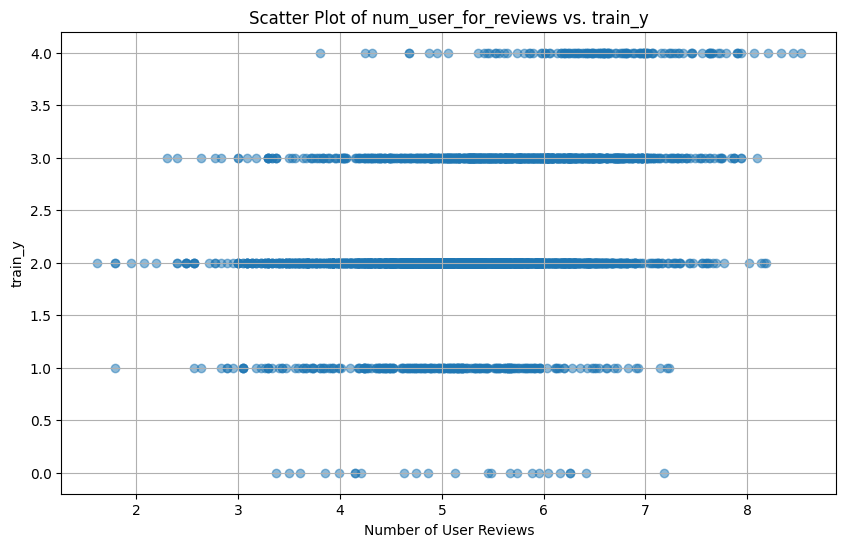

In [296]:
plt.figure(figsize=(10, 6))
plt.scatter(train_X_joined['num_user_for_reviews'], train_y, alpha=0.5)
plt.title('Scatter Plot of num_user_for_reviews vs. train_y')
plt.xlabel('Number of User Reviews')
plt.ylabel('train_y')
plt.grid(True)
plt.show()

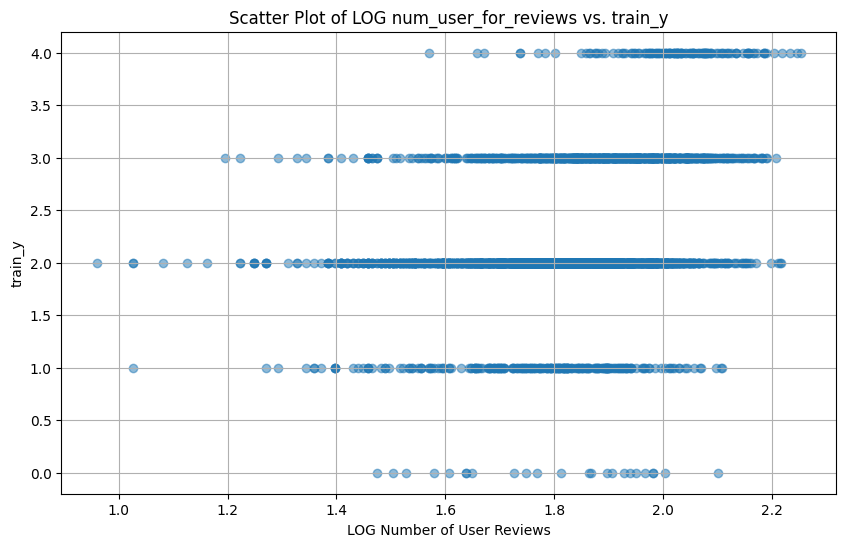

In [295]:
plt.figure(figsize=(10, 6))
plt.scatter(train_X_joined['num_user_for_reviews'].apply(np.log1p), train_y, alpha=0.5)
plt.title('Scatter Plot of LOG num_user_for_reviews vs. train_y')
plt.xlabel('LOG Number of User Reviews')
plt.ylabel('train_y')
plt.grid(True)
plt.show()

In [401]:
transformed_train_X_joined = train_X_joined[['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes',
       'num_user_for_reviews', 'actor_2_facebook_likes',
       'movie_facebook_likes']].apply(np.log1p)

In [402]:
transformed_test_X_joined = test_X_joined[['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes',
       'num_user_for_reviews', 'actor_2_facebook_likes',
       'movie_facebook_likes']].apply(np.log1p)

In [215]:
train_X_joined[['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes',
       'num_user_for_reviews', 'actor_2_facebook_likes',
       'movie_facebook_likes']] = transformed_train_X_joined[['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes',
       'num_user_for_reviews', 'actor_2_facebook_likes',
       'movie_facebook_likes']]

In [218]:
test_X_joined[['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes',
       'num_user_for_reviews', 'actor_2_facebook_likes',
       'movie_facebook_likes']] = transformed_test_X_joined[['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes',
       'num_user_for_reviews', 'actor_2_facebook_likes',
       'movie_facebook_likes']]

In [252]:
from sklearn.model_selection import train_test_split

X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(transformed_train_X_joined, train_y, test_size=0.2, random_state=999)

In [263]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

scaler = StandardScaler()

scaler.fit_transform(X_train_lr)
scaler.transform(X_test_lr)

lgr = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000, random_state=999)
knn = KNeighborsClassifier(n_neighbors=35, weights='distance')
svm = SVC(kernel='linear')
clf = RandomForestClassifier(class_weight='balanced', criterion='entropy', max_depth=50, max_features=None, n_estimators=1000)


In [249]:
from sklearn.ensemble import AdaBoostClassifier

AdaBoostModel = AdaBoostClassifier(lgr, n_estimators=100, random_state = 999)

AdaBoostModel.fit(X_train_lr, y_train_lr)

AdaBoostClassifier(estimator=LogisticRegression(max_iter=10000,
                                                multi_class='multinomial',
                                                random_state=999),
                   n_estimators=100, random_state=999)

In [250]:
y_pred = AdaBoostModel.predict(X_test_lr)
print(accuracy_score(y_test_lr, y_pred))

0.6006655574043261


In [243]:
pd.DataFrame(y_pred).value_counts()

2    458
3     65
1     30
4     30
0     18
Name: count, dtype: int64

In [244]:
pd.DataFrame(y_test_lr).value_counts()

imdb_score_binned
2                    374
3                    144
1                     49
4                     28
0                      6
Name: count, dtype: int64

### Stacked MODEL ###

In [264]:
base_models = [
    ('svm', svm),
    ('AdaLogReg', AdaBoostClassifier(lgr, n_estimators=100, random_state = 999, learning_rate=0.1)),
    ('knn', knn),
    ('clf', clf)
]

final_estimator = LogisticRegression(multi_class='multinomial', max_iter=10000)

In [265]:
stacked_clf = StackingClassifier(estimators=base_models, final_estimator=final_estimator, cv=5)

In [271]:
scaler = StandardScaler()

scaler.fit(train_X_joined)

train_X_joined_scaled = train_X_joined.copy()
test_X_joined_scaled = test_X_joined.copy()

scaler.transform(train_X_joined_scaled)
scaler.transform(test_X_joined_scaled)

array([[-1.83386552,  0.48126253, -0.48171387, ...,  1.54520375,
         0.80448132,  0.20556667],
       [ 1.22015439,  1.47449393, -1.60241501, ...,  0.72505725,
        -0.28925196,  0.33993339],
       [-0.56510689, -0.72596593,  0.25978896, ...,  0.17416157,
         0.34969481, -1.58558097],
       ...,
       [-0.98600617,  0.43382857,  0.42450999, ..., -2.42673877,
        -1.34128107, -2.79330123],
       [-0.46125768, -2.26546462, -1.60241501, ...,  0.74451952,
        -0.89844915,  0.18000324],
       [-1.52645709, -1.21504736, -0.93636424, ..., -0.23297163,
         0.94297462,  0.46501223]])

In [298]:
scaler = StandardScaler()

scaler.fit(train_X_joined_total)

train_X_joined_total_scaled = train_X_joined_total.copy()
test_X_joined_total_scaled = test_X_joined_total.copy()

scaler.transform(train_X_joined_total_scaled)
scaler.transform(test_X_joined_total_scaled)

array([[-1.14331598,  0.36168575, -0.25579522, ..., -1.32899252,
        -0.49373488,  0.31708353],
       [ 1.43021174,  1.41158038, -0.26047711, ..., -0.30128066,
         1.17357012,  1.84631968],
       [-0.72264318, -0.68820888, -0.23071365, ..., -0.92331046,
         0.41374767,  0.87515691],
       ...,
       [-0.91235837,  0.31603816, -0.21599914, ...,  0.38103543,
         0.3586708 , -0.83974637],
       [-0.66490378, -1.73810351, -0.26047711, ..., -0.66817576,
        -0.72292919, -0.66532525],
       [-1.07732809, -1.05338962, -0.25913943, ...,  0.81854361,
        -1.73052288, -1.23659133]])

In [270]:
stacked_clf.fit(train_X_joined_scaled, train_y)

StackingClassifier(cv=5,
                   estimators=[('svm', SVC(kernel='linear')),
                               ('AdaLogReg',
                                AdaBoostClassifier(estimator=LogisticRegression(max_iter=10000,
                                                                                multi_class='multinomial',
                                                                                random_state=999),
                                                   learning_rate=0.1,
                                                   n_estimators=100,
                                                   random_state=999)),
                               ('knn',
                                KNeighborsClassifier(n_neighbors=35,
                                                     weights='distance')),
                               ('clf',
                                RandomForestClassifier(class_weight='balanced',
                                                       criterion='entropy',
                                                       max_depth=50,
                                                       max_features=None,
                                                       n_estimators=1000))],
                   final_estimator=LogisticRegression(max_iter=10000,
                                                      multi_class='multinomial'))

In [272]:
predictions = stacked_clf.predict(test_X_joined_scaled)

In [273]:
def create_csv(predictions, name):
    pred_df = pd.DataFrame(predictions, columns=['imdb_score_binned'])
    pred_df.index = pd.RangeIndex(start=1, stop=len(predictions)+ 1, step=1)
    pred_df.to_csv(f'{name}_predictions.csv', index=True, index_label='id')

In [274]:
create_csv(predictions, 'stacked_untuned_no_pipeline_no_selection')

TO DO NOW:

feature selection
hyperparameter tuning
model selection - make models use different datasets / features, using PIPELINE https://scikit-learn.org/stable/auto_examples/ensemble/plot_stack_predictors.html

### Sequential Feature Selection and hyperparameter tuning for KNN ###

We run into an issue here: the chosen features impact the best hyperparameters. The chosen hyperparameters impact the best features. I will perform some loose hyperparameter optimisation, then select features properly, then tune the hyperparameters more finely as per this:

https://stats.stackexchange.com/questions/264533/how-should-feature-selection-and-hyperparameter-optimization-be-ordered-in-the-m




In [305]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

knn_pamater_grid = {'n_neighbors': [5, 50, 200, 500], 'weights':['distance', None]}

knn_grid = GridSearchCV(knn, knn_pamater_grid, verbose=3)

knn_grid.fit(train_X_joined_scaled, train_y)
print(f"best cv score: {knn_grid.best_score_}, with parameters {knn_grid.best_params_}")

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ...n_neighbors=5, weights=distance;, score=0.551 total time=   0.0s
[CV 2/5] END ...n_neighbors=5, weights=distance;, score=0.581 total time=   0.0s
[CV 3/5] END ...n_neighbors=5, weights=distance;, score=0.542 total time=   0.0s
[CV 4/5] END ...n_neighbors=5, weights=distance;, score=0.579 total time=   0.0s
[CV 5/5] END ...n_neighbors=5, weights=distance;, score=0.558 total time=   0.0s
[CV 1/5] END .......n_neighbors=5, weights=None;, score=0.582 total time=   0.0s
[CV 2/5] END .......n_neighbors=5, weights=None;, score=0.574 total time=   0.0s
[CV 3/5] END .......n_neighbors=5, weights=None;, score=0.566 total time=   0.0s
[CV 4/5] END .......n_neighbors=5, weights=None;, score=0.586 total time=   0.0s
[CV 5/5] END .......n_neighbors=5, weights=None;, score=0.563 total time=   0.0s
[CV 1/5] END ..n_neighbors=50, weights=distance;, score=0.606 total time=   0.0s
[CV 2/5] END ..n_neighbors=50, weights=distance;,

In [306]:
from sklearn.feature_selection import SequentialFeatureSelector

knn = KNeighborsClassifier(n_neighbors=50, weights='distance')

sfs = SequentialFeatureSelector(knn, direction='forward', n_features_to_select=10, cv=5)

X_train_sfs_knn = sfs.fit_transform(train_X_joined_scaled,train_y)

cols = sfs.get_support(indices=True)

train_X_joined_scaled.columns[cols]

Index(['num_critic_for_reviews', 'duration', 'num_voted_users',
       'cast_total_facebook_likes', 'facenumber_in_poster', 'title_year',
       'average_degree_centrality', 'English', 'USA', 'UK'],
      dtype='object')

In [311]:
knn = KNeighborsClassifier()

knn_pamater_grid = {'n_neighbors': [5, 10, 30, 50, 100, 200, 500], 'weights':['distance', None]}

knn_grid = GridSearchCV(knn, knn_pamater_grid, verbose=3)

knn_grid.fit(train_X_joined_scaled[['duration', 'gross', 'num_voted_users', 'average_degree_centrality',
       'English', 'USA', 'Germany', 'Canada', 'Italy', 'PG']], train_y)
print(f"best cv score: {knn_grid.best_score_}, with parameters {knn_grid.best_params_}")

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV 1/5] END ...n_neighbors=5, weights=distance;, score=0.551 total time=   0.0s
[CV 2/5] END ...n_neighbors=5, weights=distance;, score=0.576 total time=   0.0s
[CV 3/5] END ...n_neighbors=5, weights=distance;, score=0.527 total time=   0.0s
[CV 4/5] END ...n_neighbors=5, weights=distance;, score=0.571 total time=   0.0s
[CV 5/5] END ...n_neighbors=5, weights=distance;, score=0.555 total time=   0.0s
[CV 1/5] END .......n_neighbors=5, weights=None;, score=0.577 total time=   0.0s
[CV 2/5] END .......n_neighbors=5, weights=None;, score=0.571 total time=   0.0s
[CV 3/5] END .......n_neighbors=5, weights=None;, score=0.566 total time=   0.0s
[CV 4/5] END .......n_neighbors=5, weights=None;, score=0.581 total time=   0.0s
[CV 5/5] END .......n_neighbors=5, weights=None;, score=0.573 total time=   0.0s
[CV 1/5] END ..n_neighbors=10, weights=distance;, score=0.574 total time=   0.0s
[CV 2/5] END ..n_neighbors=10, weights=distance;

In [312]:
knn = KNeighborsClassifier()

knn_pamater_grid = {'n_neighbors': [5, 10, 30, 50, 100, 200, 500], 'weights':['distance', None]}

knn_grid = GridSearchCV(knn, knn_pamater_grid, verbose=3)

knn_grid.fit(train_X_joined_scaled[['duration', 'gross', 'num_voted_users', 'average_degree_centrality',
       'English', 'USA', 'PG']], train_y)
print(f"best cv score: {knn_grid.best_score_}, with parameters {knn_grid.best_params_}")

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV 1/5] END ...n_neighbors=5, weights=distance;, score=0.551 total time=   0.0s
[CV 2/5] END ...n_neighbors=5, weights=distance;, score=0.576 total time=   0.0s
[CV 3/5] END ...n_neighbors=5, weights=distance;, score=0.527 total time=   0.0s
[CV 4/5] END ...n_neighbors=5, weights=distance;, score=0.571 total time=   0.0s
[CV 5/5] END ...n_neighbors=5, weights=distance;, score=0.555 total time=   0.0s
[CV 1/5] END .......n_neighbors=5, weights=None;, score=0.577 total time=   0.0s
[CV 2/5] END .......n_neighbors=5, weights=None;, score=0.571 total time=   0.0s
[CV 3/5] END .......n_neighbors=5, weights=None;, score=0.566 total time=   0.0s
[CV 4/5] END .......n_neighbors=5, weights=None;, score=0.581 total time=   0.0s
[CV 5/5] END .......n_neighbors=5, weights=None;, score=0.573 total time=   0.0s
[CV 1/5] END ..n_neighbors=10, weights=distance;, score=0.574 total time=   0.0s
[CV 2/5] END ..n_neighbors=10, weights=distance;

In [313]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

knn = KNeighborsClassifier()


for k in [10,15,20, 30, 40, 50]:

    knn = KNeighborsClassifier()

    print('\n--------------------------------------- K = ', k,'------------------------------')

    mi=SelectKBest(score_func=mutual_info_classif, k=k)
    X_train_mi = mi.fit_transform(train_X_joined_scaled,train_y)

    print('\n--------------------------------------- mi   ------------------------------')
    pamater_grid = {'n_neighbors': [5, 10, 30, 50, 100, 200], 'weights':['uniform', 'distance']}
    grid = GridSearchCV(knn, pamater_grid, verbose=3)
    grid.fit(X_train_mi, train_y)

    print(f"best cv score: {grid.best_score_}, with parameters {grid.best_params_}")


--------------------------------------- K =  10 ------------------------------

--------------------------------------- mi   ------------------------------
Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ....n_neighbors=5, weights=uniform;, score=0.617 total time=   0.0s
[CV 2/5] END ....n_neighbors=5, weights=uniform;, score=0.644 total time=   0.0s
[CV 3/5] END ....n_neighbors=5, weights=uniform;, score=0.609 total time=   0.0s
[CV 4/5] END ....n_neighbors=5, weights=uniform;, score=0.602 total time=   0.0s
[CV 5/5] END ....n_neighbors=5, weights=uniform;, score=0.637 total time=   0.0s
[CV 1/5] END ...n_neighbors=5, weights=distance;, score=0.607 total time=   0.0s
[CV 2/5] END ...n_neighbors=5, weights=distance;, score=0.634 total time=   0.0s
[CV 3/5] END ...n_neighbors=5, weights=distance;, score=0.606 total time=   0.0s
[CV 4/5] END ...n_neighbors=5, weights=distance;, score=0.609 total time=   0.0s
[CV 5/5] END ...n_neighbors=5, weights=distance;, sco

I will try it with the WHOLE dataset:

In [299]:
knn = KNeighborsClassifier()


for k in [10,25, 50, 100, 200]:

    knn = KNeighborsClassifier()

    print('\n--------------------------------------- K = ', k,'------------------------------')

    mi=SelectKBest(score_func=mutual_info_classif, k=k)
    X_train_mi = mi.fit_transform(train_X_joined_total_scaled,train_y)

    print('\n--------------------------------------- mi   ------------------------------')
    pamater_grid = {'n_neighbors': [5, 10, 30, 50, 100, 200], 'weights':['uniform', 'distance']}
    grid = GridSearchCV(knn, pamater_grid, verbose=3)
    grid.fit(X_train_mi, train_y)

    print(f"best cv score: {grid.best_score_}, with parameters {grid.best_params_}")


--------------------------------------- K =  10 ------------------------------

--------------------------------------- mi   ------------------------------
Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ....n_neighbors=5, weights=uniform;, score=0.611 total time=   0.0s
[CV 2/5] END ....n_neighbors=5, weights=uniform;, score=0.641 total time=   0.0s
[CV 3/5] END ....n_neighbors=5, weights=uniform;, score=0.611 total time=   0.0s
[CV 4/5] END ....n_neighbors=5, weights=uniform;, score=0.612 total time=   0.0s
[CV 5/5] END ....n_neighbors=5, weights=uniform;, score=0.633 total time=   0.0s
[CV 1/5] END ...n_neighbors=5, weights=distance;, score=0.611 total time=   0.0s
[CV 2/5] END ...n_neighbors=5, weights=distance;, score=0.634 total time=   0.0s
[CV 3/5] END ...n_neighbors=5, weights=distance;, score=0.597 total time=   0.0s
[CV 4/5] END ...n_neighbors=5, weights=distance;, score=0.607 total time=   0.0s
[CV 5/5] END ...n_neighbors=5, weights=distance;, sco

### Random Forest and clustering ###
One idea I had is to use create clusters to cluster the genre, title keywords etc.

I will then do a random forest from there. Luckily, the random forest splits numerical features automatically based on a split that is 'best', meaning it probably maximises IG

In [315]:
to_cluster = [(train_doc2vec_features_genre_df, test_doc2vec_features_genre_df, 'genre'), (train_doc2vec_features_plot_keywords_df, test_doc2vec_features_plot_keywords_df, 'plot_keywords'),(train_fasttext_title_embeddings_df,test_fasttext_title_embeddings_df, 'title')]

In [330]:
from sklearn.cluster import KMeans

new_train_features = pd.DataFrame()
new_test_features = pd.DataFrame()

for train_df, test_df, feature in to_cluster:

    kmeans=KMeans(n_clusters=7, random_state=999)
    kmeans.fit(train_df)

    new_train_features[feature + '_cluster'] = kmeans.labels_
    new_test_features[feature + '_cluster'] = kmeans.predict(test_df)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


preliminary check on a decision tree

In [331]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
dt = DecisionTreeClassifier()

scores = cross_val_score(dt, new_train_features, train_y)
print(scores)
print(np.mean(scores))

[0.59733777 0.59733777 0.5890183  0.58402662 0.59166667]
0.59187742651137


Now for a random forest. First join all the data

In [337]:
train_X_rf = pd.concat([train_X, new_train_features], axis=1)
test_X_rf = pd.concat([test_dataset, new_test_features], axis=1)

In [340]:
train_X_rf.shape

(3004, 37)

In [342]:
# adapted from code in the tutorial 9

for k in [10, 20, 30, 37]:

    clf = RandomForestClassifier(random_state=99)

    print('\n--------------------------------------- K = ', k,'------------------------------')

    mi=SelectKBest(score_func=mutual_info_classif, k=k)
    X_train_mi = mi.fit_transform(train_X_rf,train_y)


    print('\n--------------------------------------- mi   ------------------------------')
    pamater_grid = {'n_estimators': [100], 'class_weight': ['balanced', 'balanced_subsample', None], 'criterion':['gini', 'entropy'], 'max_depth': [5, 10, 30, None], 'max_features': ['sqrt', 'log2', 20, None]}
    grid = GridSearchCV(clf, pamater_grid, verbose=3)
    grid.fit(X_train_mi, train_y)

    print(f"best cv score: {grid.best_score_}, with parameters {grid.best_params_}")


--------------------------------------- K =  10 ------------------------------

--------------------------------------- mi   ------------------------------
Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV 1/5] END class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100;, score=0.446 total time=   0.2s
[CV 2/5] END class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100;, score=0.473 total time=   0.2s
[CV 3/5] END class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100;, score=0.461 total time=   0.2s
[CV 4/5] END class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100;, score=0.438 total time=   0.2s
[CV 5/5] END class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100;, score=0.478 total time=   0.2s
[CV 1/5] END class_weight=balanced, criterion=gini, max_depth=5, max_features=log2, n_estimators=100;, score=0.

In [356]:
clf = RandomForestClassifier(class_weight=None, criterion='gini', max_depth=30, max_features=20, n_estimators=10000, random_state=99)

clf.fit(train_X_rf, train_y)

predictions = clf.predict(test_X_rf)
create_csv(predictions, 'new_features_10000_rf')

In [357]:
pd.DataFrame(predictions).value_counts()

2    562
3    156
4     22
1     12
Name: count, dtype: int64

Join it with ada boost

In [372]:
dt = DecisionTreeClassifier(max_depth=2)

AdaBoostModel = AdaBoostClassifier(base_estimator=dt, n_estimators=10000, random_state = 999)

AdaBoostModel.fit(train_X_rf, train_y)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   n_estimators=10000, random_state=999)

In [373]:
predictions = AdaBoostModel.predict(test_X_rf)

In [374]:
pd.DataFrame(predictions).value_counts()

3    308
2    227
1    148
4     65
0      4
Name: count, dtype: int64

Joining them

In [375]:
base_models = [
    ('AdaDT', AdaBoostClassifier(dt, n_estimators = 10000, random_state=999)),
    ('RF', clf)
]

final_estimator = LogisticRegression(multi_class='multinomial', max_iter=10000)

In [377]:
stacked_clf = StackingClassifier(estimators=base_models, final_estimator=final_estimator, cv=5)
stacked_clf.fit(train_X_rf, train_y)

StackingClassifier(cv=5,
                   estimators=[('AdaDT',
                                AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),
                                                   n_estimators=10000,
                                                   random_state=999)),
                               ('RF',
                                RandomForestClassifier(max_depth=30,
                                                       max_features=20,
                                                       n_estimators=10000,
                                                       random_state=99))],
                   final_estimator=LogisticRegression(max_iter=10000,
                                                      multi_class='multinomial'))

In [379]:
predictions = stacked_clf.predict(test_X_rf)

In [380]:
create_csv(predictions, 'stacked_ada_rf')

In [381]:
pd.DataFrame(predictions).value_counts()

2    545
3    167
4     22
1     18
Name: count, dtype: int64

### Testing Naive Bayes ###

In [345]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

scaler = StandardScaler()

scaler.fit(train_X_rf)
scaler.transform(test_X_rf)

train_X_rf_scaled = scaler.transform(train_X_rf)
test_X_rf_scaled = scaler.transform(test_X_rf)

scores = cross_val_score(gnb, train_X_rf_scaled, train_y)
print(scores)
print(np.mean(scores))

[0.05324459 0.07154742 0.06655574 0.06988353 0.06666667]
0.065579589572934


### Linear Regression ###

In [403]:
transformed_train_X_joined

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,actor_2_facebook_likes,movie_facebook_likes
0,5.231109,4.304065,3.367296,6.742881,7.601402,19.862371,13.375996,8.773230,6.487684,6.787845,9.741027
1,5.533389,4.584967,0.000000,5.455321,6.484635,16.832708,11.275734,7.537430,6.496775,6.272877,0.000000
2,5.451038,4.770685,5.459586,5.402677,9.392745,12.826375,10.504931,9.518413,4.779123,6.908755,9.305741
3,5.697093,4.700480,0.000000,4.983607,6.864848,16.438935,12.461021,7.471932,6.815640,5.099866,10.043293
4,5.697093,5.147494,0.000000,6.754604,9.680406,19.564386,14.029611,10.014268,8.529319,8.517393,9.952325
...,...,...,...,...,...,...,...,...,...,...,...
2999,5.087596,4.867534,3.761200,3.912023,4.584967,18.358298,11.790928,5.765191,5.318120,3.931826,9.392745
3000,5.976351,4.820282,7.601402,6.156979,10.165890,17.107775,12.652776,10.524252,6.165418,9.210440,11.326608
3001,5.379897,4.779123,6.161207,6.871091,9.798183,18.110663,12.289867,10.022070,6.063785,6.908755,9.952325
3002,4.700480,4.564348,0.000000,0.000000,5.429346,13.874338,9.185125,5.446737,4.204693,1.609438,0.000000


In [422]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(transformed_train_X_joined, train_y, test_size=0.3, random_state=9)


In [423]:
def linear_binner(x):
    if x < 1:
        return 0
    elif x <= 1.5:
        return 1
    elif x <= 2.5:
        return 2
    elif x <= 3.5:
        return 3
    else:
        return 4

In [424]:
lr.fit(X_train_lr,y_train_lr)

predictions = pd.DataFrame(lr.predict(X_test_lr))
predictions.columns = ['predictions']
predictions['predictions'] = predictions['predictions'].apply(linear_binner)

In [425]:
accuracy_score(y_test_lr, predictions['predictions'])

0.6385809312638581

### Creating a Custom stacker ###

Unfortunately sklearn's basic StackingClassifier cannot handle having each model use a different set of input data. For this reason I will create my own class that is initialised with the input models, their respective data, and the final model

This way we can be flexible when we apply the final stacking

Based on this: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingRegressor.html, https://towardsdatascience.com/how-to-properly-validate-a-model-when-stacking-ad2ee1b2b9c this for k fold, 

But I have only implemented fit and predict methods

https://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html
this is the base estimator parent class

RegressorMixin 
https://scikit-learn.org/stable/modules/generated/sklearn.base.RegressorMixin.html


this is the base 




In [277]:
from sklearn.base import BaseEstimator, RegressorMixin, clone
from sklearn.model_selection import KFold

class Project2Stacker(BaseEstimator, RegressorMixin):
    """ this stacker is able to handle multiple datasets that are different based on the model
    that is in the base. This allows more flexibility over the sklearn StackingClassifier. The
    user must feed in the required data in the form [(model1, data_x1, data_y1), (model2, data_x2, data_y2) ... ]"""

    def __init__(self, models_and_data, final_model, n_folds=5):
        self.models_and_data = models_and_data
        self.final_model = final_model
        self.n_folds = n_folds

    # make something to fit it
    def fit(self, y):

        # if I clone the model, this means it is fresh (doesn't contain the previous fit)
        kf = KFold(n_splits=self.n_folds)
        base_prediction_features = []

        for model, X_train, y_train in self.models_and_data:
            model_copies = [clone(model) for _ in range(self.n_folds)]
            this_model_meta_features = []

            # do a k fold and predict
            for idx, (train_index, test_index) in enumerate(kf.split(X_train)):
                model_copies[idx].fit(X_train[train_index], y[train_index])
                predictions = model_copies[idx].predict(X_train[test_index])
                this_model_meta_features.append(predictions)

            this_model_meta_features = np.concatenate(this_model_meta_features)
            if base_prediction_features is None:
                base_prediction_features = this_model_meta_features.reshape(-1,1) # columns is 1, rows is unknown (-1) to be safe
            else:
                base_prediction_features = np.hpstack((base_prediction_features, this_model_meta_features.reshape(-1, 1)))

         # now I will fit the final model on the stacked meta features
         self.final_model_ = clone(self.final_model)
         self.final_model_.fit(base_prediction_features, y)  

    def predict(self, X):

        meta_features =      


        
